# Data Exploration

## Data Import


## Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Import and preview the dataset
Each row in `samples.csv` is the SHA256 hash of a sample. Each numeric column represents a `rule_id` value located in the `rule_ids.csv` file. If a capa rule hit for a given sample, the corresponding `rule_id` column has the value `1`; otherwise, the value is `0`. There are 319 capas represented in the dataset.

In [2]:
# samples_with_int_capas denotes the fact that the column names are numeric rule IDs, as opposed to rule names
samples_with_int_capas_df = pd.read_csv("samples.csv", index_col="sha256")
samples_with_int_capas_df.head()

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
sha256,,,,,,,,,,,,,,,,,,,,,
50174311e524b97ea5cb4f3ea571dd477d1f0eee06cd3ed73af39a15f3e6484a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dc9b5e8aa6ec86db8af0a7aa897ca61db3e5f3d2e0942e319074db1aaccfdc83,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
aec85f49dae7348338e91ce28556bd42a6ac7cef9a0af40f99fef92f4b428f33,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
91e2f357ad9a41974d028672d4f233379965d8f027ca909f6b58110bc7e627f2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c6930e298bba86c01d0fe2c8262c46b4fce97c6c5037a193904cfc634246fbec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


`sample_roles.csv` contains the role label for each SHA256 hash:

In [3]:
roles_df = pd.read_csv("sample_roles.csv", index_col="sha256")
roles_df.head()

,role
sha256,
1ec52156970a65864711836a379f5a654d78ed1ffe381a27971c37e6ea641a92,backdoor
7199acca3d851889efa4a5a42b3f55010f4916294201ce5ad20c76898200ffa9,backdoor
aec85f49dae7348338e91ce28556bd42a6ac7cef9a0af40f99fef92f4b428f33,backdoor
c69121a994ea8ff188510f41890208625710870af9a06b005db817934b517bc1,backdoor
c74df42cfc7c7221f7f28c67bd726a1caad8453fc35daddfb094aaeede2e8e1e,backdoor


`rule_ids.csv` contains a mapping of rule IDs to their namespace and rule name. The `namespace` column is the parent folder of each rule within the [`capa-rules` repository](https://github.com/mandiant/capa-rules). The namespace acts as a de facto category that contains one or more rules.

In [4]:
rules_df = pd.read_csv("rule_ids.csv", index_col="rule_id")
rules_df.head()

,namespace,rule_name
rule_id,,
0,anti-analysis,reference analysis tools strings
1,anti-analysis/anti-debugging/debugger-detection,check for software breakpoints
2,anti-analysis/anti-debugging/debugger-detection,check for time delay via GetTickCount
3,anti-analysis/anti-debugging/debugger-detection,check for time delay via QueryPerformanceCounter
4,anti-analysis/anti-debugging/debugger-detection,execute anti-debugging instructions


## Data Structure
The following cell produces additional details on each dataset element's structure:

In [5]:
print(f"\n\nData Structure - samples.csv")
print("------------------------------")
print("Dimensions:\n")
print(f"    Rows: {samples_with_int_capas_df.shape[0]}")
print(f"    Columns: {samples_with_int_capas_df.shape[1]}")
print(f"\nData Types:\n\n{samples_with_int_capas_df.dtypes}")
print(f"\nMissing Values:\n\n{samples_with_int_capas_df.isnull().sum()}")

print(f"\n\nData Structure - sample_roles.csv")
print("-----------------------------------")
print("Dimensions:\n")
print(f"    Rows: {roles_df.shape[0]}")
print(f"    Columns: {roles_df.shape[1]}")
print(f"\nData Types:\n\n{roles_df.dtypes}")
print(f"\nMissing Values:\n\n{roles_df.isnull().sum()}")

print(f"\n\nData Structure - rule_ids.csv")
print("--------------------------------")
print("Dimensions:\n")
print(f"    Rows: {rules_df.shape[0]}")
print(f"    Columns: {rules_df.shape[1]}")
print(f"\nData Types:\n\n{rules_df.dtypes}")
print(f"\nMissing Values:\n\n{rules_df.isnull().sum()}")



Data Structure - samples.csv
------------------------------
Dimensions:

    Rows: 58
    Columns: 319

Data Types:

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
314    int64
315    int64
316    int64
317    int64
318    int64
Length: 319, dtype: object

Missing Values:

0      0
1      0
2      0
3      0
4      0
      ..
314    0
315    0
316    0
317    0
318    0
Length: 319, dtype: int64


Data Structure - sample_roles.csv
-----------------------------------
Dimensions:

    Rows: 58
    Columns: 1

Data Types:

role    object
dtype: object

Missing Values:

role    0
dtype: int64


Data Structure - rule_ids.csv
--------------------------------
Dimensions:

    Rows: 319
    Columns: 2

Data Types:

namespace    object
rule_name    object
dtype: object

Missing Values:

namespace    0
rule_name    0
dtype: int64


## Merging and Transforming Dataset Elements
To begin, we'll merge the role labels into the samples DataFrame. Then we'll make a copy of the merged DataFrame and rename the columns from rule ID values to their corresponding rule name.

In [6]:
# Merge the roles into the samples DataFrame
samples_with_int_capas_df = pd.merge(samples_with_int_capas_df, roles_df, on="sha256")

# Create a separate DataFrame that uses rule names instead of rule IDs
samples_with_named_capas_df = samples_with_int_capas_df.copy()
samples_with_named_capas_df.columns = rules_df["rule_name"].tolist() + ["role"]

# Preview the samples_with_named_capas_df DataFrame
samples_with_named_capas_df.head()

,reference analysis tools strings,check for software breakpoints,check for time delay via GetTickCount,check for time delay via QueryPerformanceCounter,execute anti-debugging instructions,impersonate file version information,clear Windows event logs,self delete,timestomp file,check for foreground window switch,...,spawn thread to RWX shellcode,persist via Run registry key,persist via Windows service,get startup folder,write file to startup folder,unmanaged call,compiled to the .NET platform,identify system language via API,hook routines via microsoft detours,role
sha256,,,,,,,,,,,,,,,,,,,,,
50174311e524b97ea5cb4f3ea571dd477d1f0eee06cd3ed73af39a15f3e6484a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,rootkit
dc9b5e8aa6ec86db8af0a7aa897ca61db3e5f3d2e0942e319074db1aaccfdc83,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,dropper
aec85f49dae7348338e91ce28556bd42a6ac7cef9a0af40f99fef92f4b428f33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,backdoor
91e2f357ad9a41974d028672d4f233379965d8f027ca909f6b58110bc7e627f2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,infostealer
c6930e298bba86c01d0fe2c8262c46b4fce97c6c5037a193904cfc634246fbec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,reconnaissance tool


## Visualizations and Statistics

### Role Distribution

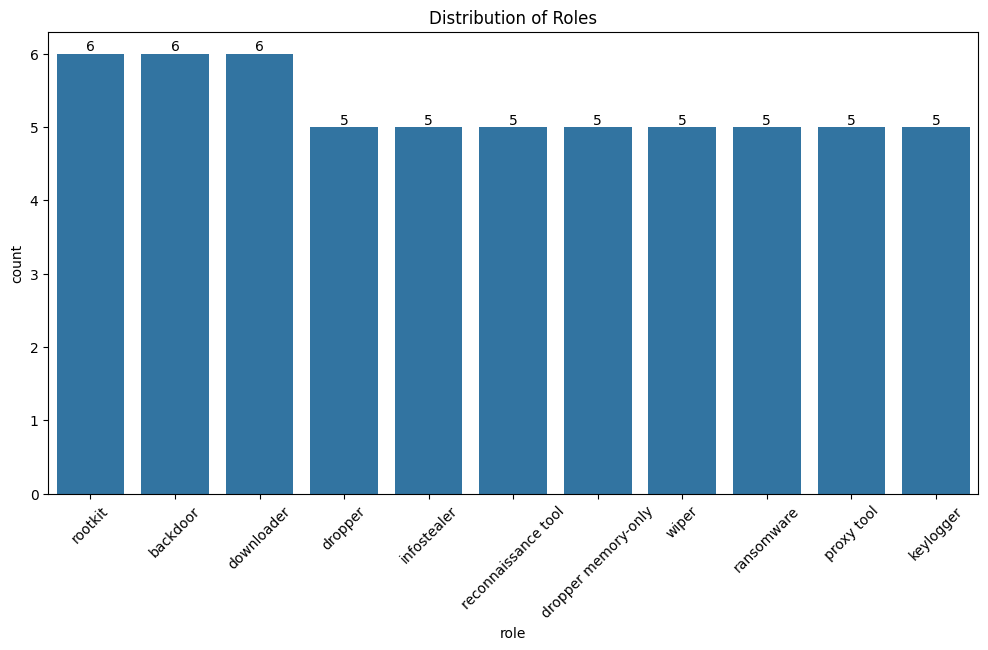

In [7]:
# Distribution of roles sorted by count
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=samples_with_int_capas_df, x="role", order=samples_with_int_capas_df["role"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Distribution of Roles")
plt.xticks(rotation=45)
plt.show()

### Capa Frequency

Capability Frequency (sample count: 58):

link function at runtime on Windows                      42
write file on Windows                                    41
read file on Windows                                     40
create thread                                            37
encode data using XOR                                    35
terminate process                                        34
get common file path                                     29
resolve function by parsing PE exports                   26
check if file exists                                     24
get file size                                            23
receive data                                             22
create process on Windows                                21
send data                                                21
link many functions at runtime                           21
delete file                                              19
contain obfuscated stackstrings                          1

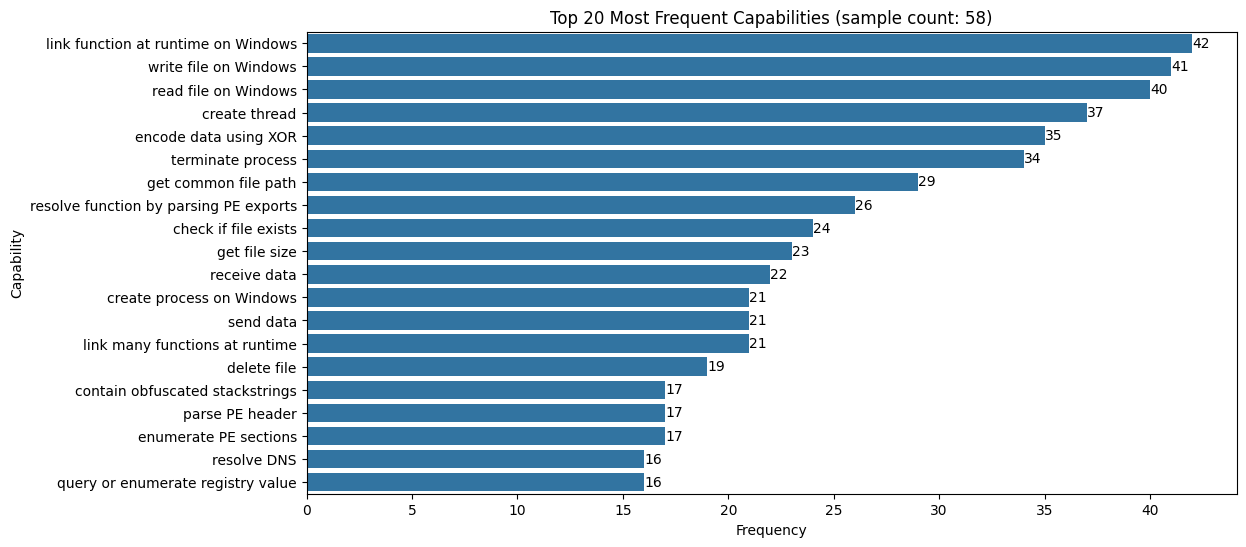

In [8]:
# Get a list of capabilities sorted by frequency
sample_count = samples_with_named_capas_df.shape[0]
most_frequent_capabilities = samples_with_named_capas_df.iloc[:, 1:-1].sum().sort_values(ascending=False)

# Print the full list of capabilities sorted by frequency
print(f"Capability Frequency (sample count: {sample_count}):\n")
print(most_frequent_capabilities.to_string())

# Plot the top 20 most frequent capabilities
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=most_frequent_capabilities.head(20).values, y=most_frequent_capabilities.head(20).index)
plt.ylabel("Capability")
plt.xlabel("Frequency")
ax.bar_label(ax.containers[0])
plt.title(f"Top 20 Most Frequent Capabilities (sample count: {sample_count})")
plt.show()

#### Dimensionality Reduction: Inconsequential capas
Domain knowledge was used to examine the list of capas above and remove the rules in the Python list below because they likely have little-to-no relationship to a sample's primary functionality.

In [9]:
rule_names_to_remove = [
    "link function at runtime on Windows",
    "create thread",
	"encode data using XOR",
	"resolve function by parsing PE exports",
    "contain obfuscated stackstrings",
    "access PEB ldr_data",
    "link many functions at runtime",
	"accept command line arguments",
    "print debug messages",
    "contains PDB path",
	"terminate thread",
    "check for time delay via GetTickCount",
    "compiled to the .NET platform",
	"check mutex and exit",
	"linked against CPP standard library",
	"check for software breakpoints",
	"get ntdll base address",
	"reference anti-VM strings targeting VirtualBox",
	"resolve function by hash",
	"encode data using ADD XOR SUB operations",
	"check for time delay via QueryPerformanceCounter",
	"get kernel32 base address",
	"populate SysWhispers2 syscall list",
	"compiled with Borland Delphi",
	"reference anti-VM strings targeting Qemu",
    "reference anti-VM strings targeting VMWare",
	"debug build",
	"execute anti-debugging instructions",
	"reference analysis tools strings",
    "check for foreground window switch",
    "contain a thread local storage (.tls) section"
]

# Get the rule IDs associated with the rule names listed above
rule_ids_to_remove = rules_df[rules_df["rule_name"].isin(rule_names_to_remove)].index.tolist()

# Convert the rule IDs to strings for removal
rule_ids_to_remove = [str(rule_id) for rule_id in rule_ids_to_remove]

# Print the rule column count before removing the rules; subtracting 1 to account for the role column
print(f"Rule Column Count Before Removing {len(rule_names_to_remove)} Rules: {samples_with_int_capas_df.shape[1] - 1}")

# Remove the rules from the dataframes
samples_with_int_capas_df.drop(columns=rule_ids_to_remove, inplace=True)
samples_with_named_capas_df.drop(columns=rule_names_to_remove, inplace=True)

# Print the rule column count after removing the rules; subtracting 1 to account for the role column
print(f"Rule Column Count After Removing {len(rule_names_to_remove)} Rules: {samples_with_int_capas_df.shape[1] - 1}")

Rule Column Count Before Removing 31 Rules: 319
Rule Column Count After Removing 31 Rules: 288


### Most Frequent Capabilities Per Role

In [10]:
# For each role, print the list of the top 5 most common capabilities
role_top_5 = {}
for role in sorted(samples_with_named_capas_df["role"].unique()):
    role_df = samples_with_named_capas_df[samples_with_named_capas_df["role"] == role]
    role_df = role_df.drop(columns=["role"])
    role_top_5[role] = role_df.sum().sort_values(ascending=False).head(5)

    sample_count = samples_with_named_capas_df[samples_with_named_capas_df["role"] == role].shape[0]

    print(f"\nRole: {role} ({sample_count} samples)")
    print(role_top_5[role].to_string())


Role: backdoor (6 samples)
write file on Windows        6
get common file path         5
terminate process            5
create process on Windows    5
check if file exists         4

Role: downloader (6 samples)
read data from Internet    5
receive data               5
write file on Windows      5
connect to HTTP server     5
read file on Windows       5

Role: dropper (5 samples)
get common file path     4
write file on Windows    4
read file on Windows     4
get file size            4
linked against ZLIB      3

Role: dropper memory-only (5 samples)
allocate or change RWX memory          3
terminate process                      3
execute shellcode via indirect call    3
acquire debug privileges               2
read file on Windows                   2

Role: infostealer (5 samples)
check if file exists     5
get common file path     4
copy file                3
enumerate PE sections    3
delete file              3

Role: keylogger (5 samples)
write file on Windows        5
get graphi

#### Observations
In some cases, the capas listed above align with the role. For example, two of the most frequent capas for downloaders are `read data from Internet` and `write file on Windows`, which is expected for samples that download payloads and, in some cases, write them to the filesystem. However, in the case of ransomware, only one of the top five capas (`reference public RSA key`) is representative of core ransomware behavior. To see what can be done about this, let's take a closer a look at variable relationships, starting with ransomware samples. 



## Variable Relationships

### Ransomware

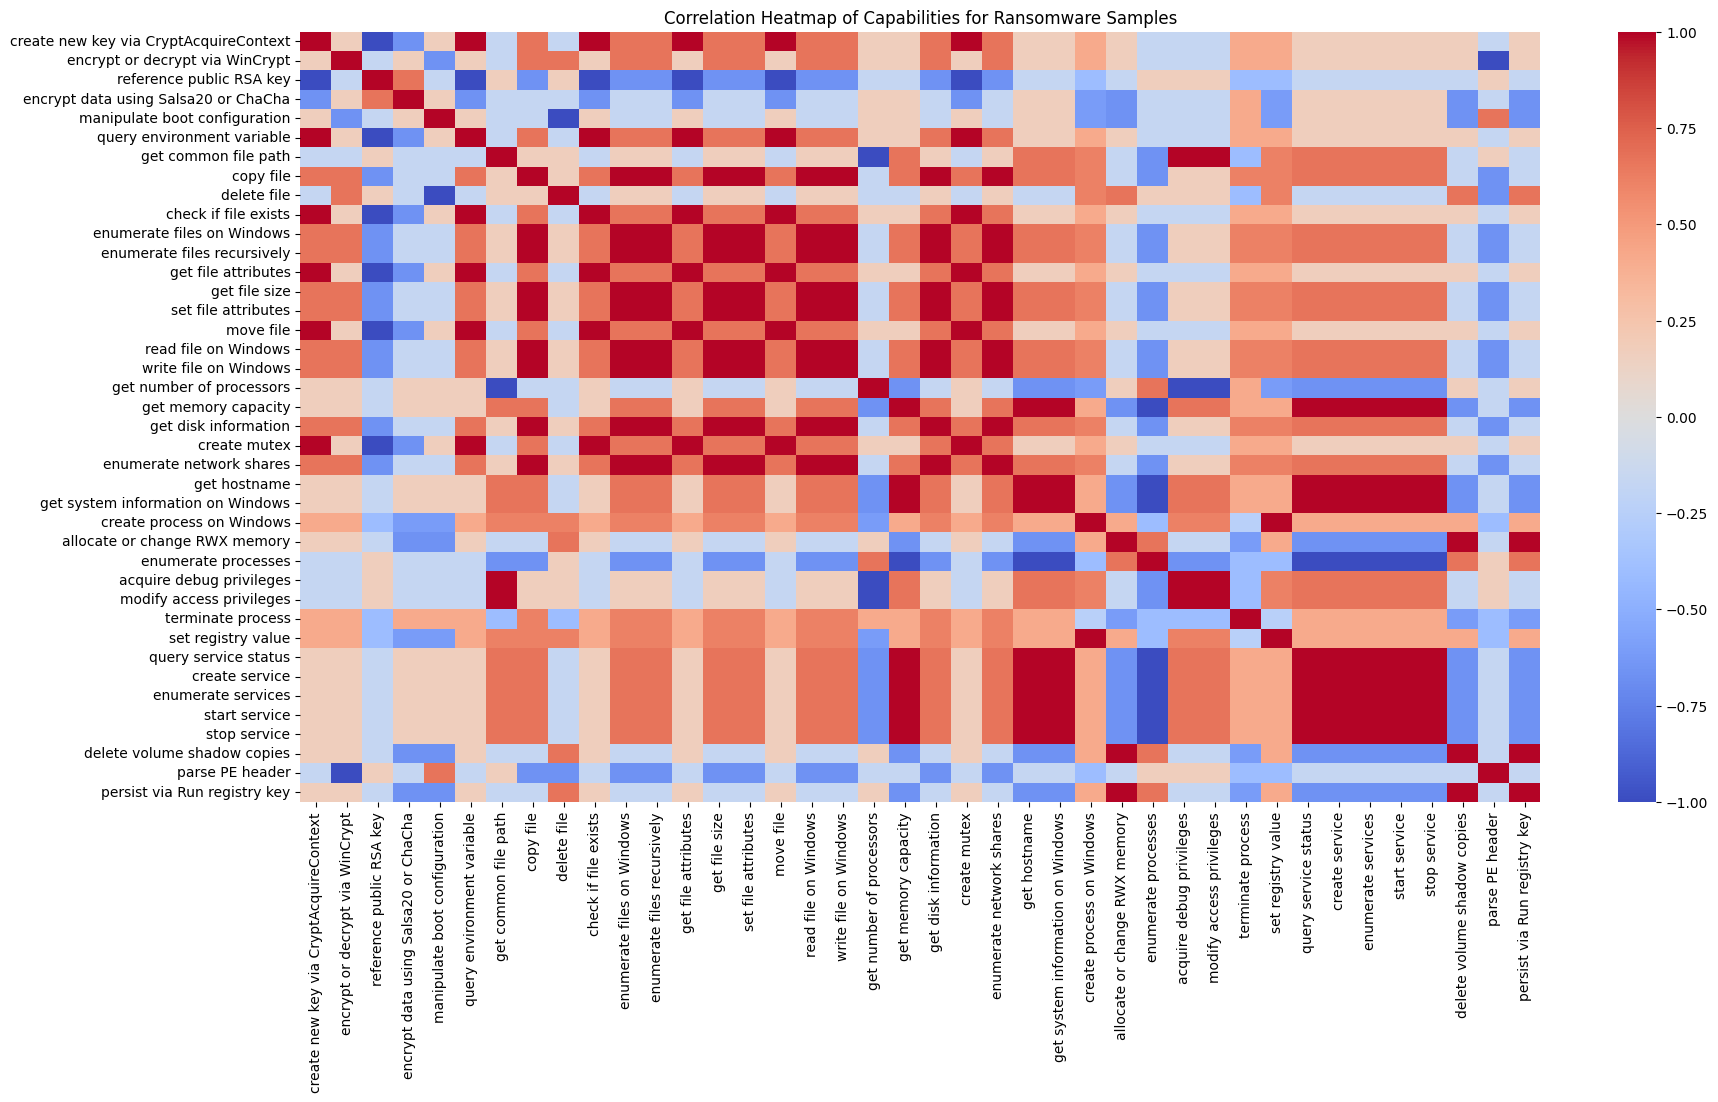

In [11]:
# Reduce the dataframe to only ransomware samples
ransomware_df = samples_with_named_capas_df[samples_with_named_capas_df["role"] == "ransomware"]

# Reduce the dataframe to include capability columns that occur in at least 2 samples
ransomware_df = ransomware_df.loc[:, (ransomware_df != 0).sum() >= 2]

# Create a heatmap of the correlation between capabilities for ransomware samples
plt.figure(figsize=(20, 10))
sns.heatmap(ransomware_df.iloc[:, 1:-1].corr(), cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Correlation Heatmap of Capabilities for Ransomware Samples")
plt.show()

#### Observations
The heatmap above contains at least two notable clusters:
  1. File-related capabilities near the center (i.e., `read file on Windows`, `write file on Windows`, etc.)
  2. Services-related capabilities near the bottom-right (i.e., `query service status`, `create service`, etc.)

Clusters likely these could be collapsed based on their namespace. Using the examples above, the namespaces correspond to `host-interaction/file-system` and `host-interaction/service`. Let's use feature engineering to create new features based on namespace information. After creating these new features and removing individual capa columns, dimensionality should be significantly reduced.

## Feature Engineering

### Adding Namespace Features

In [12]:
# Hide performance warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Make a copy of the samples_with_int_capas_df DataFrame
namespace_df = samples_with_int_capas_df.copy()

# Get unique namespaces from the rules_df DataFrame
unique_namespaces = rules_df["namespace"].unique()

# Create a new column for each unique namespace
for namespace in unique_namespaces:
    namespace_df[namespace] = 0

# Iterate over each row in the namespace_df DataFrame
for index, row in namespace_df.iterrows():
    # Get the list of columns with a value of 1
    columns_with_one = row[row == 1].index.tolist()
    
    # For each rule_id in the columns_with_one list, get the namespace
    rule_ids = [int(column) for column in columns_with_one if column.isdigit()]

    # Get the corresponding namespaces for the rule_ids
    namespaces = rules_df.loc[rule_ids, "namespace"].tolist()

    # For each namespace in the namespaces list, increment the value in the namespace column for the current sample
    for namespace in namespaces:
        namespace_df.at[index, namespace] += 1

# Remove the rule_id columns from the namespace_df DataFrame
rule_columns = [col for col in namespace_df.columns if col.isdigit()]
namespace_df.drop(columns=rule_columns, inplace=True)

# Remove namespace columns with all zeros
namespace_df = namespace_df.loc[:, (namespace_df != 0).any(axis=0)]

# Display the first few rows of the namespace_df DataFrame
namespace_df.head()

,role,anti-analysis/anti-forensic,anti-analysis/anti-forensic/clear-logs,anti-analysis/anti-forensic/self-deletion,anti-analysis/anti-forensic/timestomp,collection,collection/browser,collection/credit-card,collection/database/sql,collection/keylog,...,linking/static/zlib,load-code/dotnet,load-code/pe,load-code/shellcode,persistence/registry/run,persistence/service,persistence/startup-folder,runtime,targeting/language,unknown
sha256,,,,,,,,,,,,,,,,,,,,,
50174311e524b97ea5cb4f3ea571dd477d1f0eee06cd3ed73af39a15f3e6484a,rootkit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dc9b5e8aa6ec86db8af0a7aa897ca61db3e5f3d2e0942e319074db1aaccfdc83,dropper,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
aec85f49dae7348338e91ce28556bd42a6ac7cef9a0af40f99fef92f4b428f33,backdoor,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,0,0
91e2f357ad9a41974d028672d4f233379965d8f027ca909f6b58110bc7e627f2,infostealer,0,0,0,0,0,0,1,1,0,...,0,0,2,0,0,0,0,0,0,0
c6930e298bba86c01d0fe2c8262c46b4fce97c6c5037a193904cfc634246fbec,reconnaissance tool,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0


After removing the rule ID columns and adding a column for each unique namespace, we've cut our feature count nearly in half from 319 (originally) to 162. Let's review some of the most common namespaces.

### Top 10 Namespaces

In [13]:
most_frequent_namespaces = namespace_df.iloc[:, 1:].sum().sort_values(ascending=False)
print("Top 10 Most Frequent Namespaces:\n")
print(most_frequent_namespaces.head(10).to_string())

Top 10 Most Frequent Namespaces:

communication/http/client             55
host-interaction/file-system/read     50
host-interaction/file-system/meta     47
communication                         44
communication/socket                  42
host-interaction/file-system/write    41
load-code/pe                          36
host-interaction/file-system          34
host-interaction/process/terminate    34
host-interaction/process/create       32


### Most Frequent Namespaces Per Role

In [14]:
role_top_5_namespaces = {}
for role in sorted(namespace_df["role"].unique()):
    role_df = namespace_df[namespace_df["role"] == role]
    role_df = role_df.drop(columns=["role"])
    role_top_5_namespaces[role] = role_df.sum().sort_values(ascending=False).head(5)

    sample_count = namespace_df[namespace_df["role"] == role].shape[0]

    print(f"\nRole: {role} ({sample_count} samples)")
    print(role_top_5_namespaces[role].to_string())


Role: backdoor (6 samples)
communication/http/client          13
host-interaction/process/create     9
communication                       8
communication/http                  8
communication/socket                8

Role: downloader (6 samples)
communication/http/client            20
communication                         8
host-interaction/file-system/read     7
communication/http                    7
host-interaction/session              5

Role: dropper (5 samples)
host-interaction/file-system/meta     4
host-interaction/file-system          4
host-interaction/file-system/write    4
host-interaction/file-system/read     4
communication/socket                  3

Role: dropper memory-only (5 samples)
host-interaction/process/modify      4
load-code/shellcode                  4
host-interaction/file-system/read    3
host-interaction/session             3
load-code/pe                         3

Role: infostealer (5 samples)
host-interaction/file-system/meta      7
host-interaction/fi

#### Observations
As expected after grouping capabilities based on their namespace, we see higher frequency counts compared to the individual capability counts above (see [Most Frequent Capabilities Per Role](#most-frequent-capabilities-per-role)). The majority of the top namespaces for each role generally align with the expected role behavior. Continuing with the ransomware example, as a reminder here are the most frequent capas for ransomware samples (count: 5):

| capa rule                        | count |
|----------------------------------|-------|
| terminate process                | 4     |
| set registry value               | 4     |
| create process on Windows        | 4     |
| reference public RSA key         | 3     |
| parse PE header                  | 3     |

And below are the most frequent namespaces. Note the count exceeds the sample count (5) due to multiple rules being present in a single namespace.

| namespace                                | count |
|------------------------------------------|--------------|
| host-interaction/file-system/meta        | 9            |
| load-code/pe                             | 8            |
| host-interaction/process/modify          | 6            |
| data-manipulation/encryption/aes         | 6            |
| host-interaction/file-system/files/list  | 6            |


We previously observed only one of the top 5 capas represented core ransomware behavior (`reference public RSA key`). Now that we've collapsed capabilities into their respective namespaces, there are three notable namespaces in the second table above that _do_ represent typical ransomware behavior:

* `host-interaction/file-system/meta` - commonly used to get or check file information prior to encryption
* `data-manipulation/encryption/aes` - encrypt files using AES
* `host-interaction/file-system/files/list` - enumerate files to encrypt

Similar trends are present for additional roles.

## Feature Selection

### Normalizing the Namespace DataFrame
To prepare the data for feature selection, we'll normalize the `namespace_df` DataFrame using `MinMaxScaler`:

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_namespace_df = namespace_df.copy()
normalized_namespace_df.iloc[:, 1:] = scaler.fit_transform(normalized_namespace_df.iloc[:, 1:])
normalized_namespace_df.head()

,role,anti-analysis/anti-forensic,anti-analysis/anti-forensic/clear-logs,anti-analysis/anti-forensic/self-deletion,anti-analysis/anti-forensic/timestomp,collection,collection/browser,collection/credit-card,collection/database/sql,collection/keylog,...,linking/static/zlib,load-code/dotnet,load-code/pe,load-code/shellcode,persistence/registry/run,persistence/service,persistence/startup-folder,runtime,targeting/language,unknown
sha256,,,,,,,,,,,,,,,,,,,,,
50174311e524b97ea5cb4f3ea571dd477d1f0eee06cd3ed73af39a15f3e6484a,rootkit,0,0,0,0,0,0.0,0,0,0.000000,...,0,0,0.0,0.0,0,0,0.0,0,0,0
dc9b5e8aa6ec86db8af0a7aa897ca61db3e5f3d2e0942e319074db1aaccfdc83,dropper,0,0,0,1,0,0.0,0,0,0.000000,...,1,0,0.0,0.0,0,0,0.0,0,0,0
aec85f49dae7348338e91ce28556bd42a6ac7cef9a0af40f99fef92f4b428f33,backdoor,0,0,0,0,0,0.0,0,0,0.000000,...,1,0,1.0,0.5,0,0,0.0,0,0,0
91e2f357ad9a41974d028672d4f233379965d8f027ca909f6b58110bc7e627f2,infostealer,0,0,0,0,0,0.0,1,1,0.000000,...,0,0,1.0,0.0,0,0,0.0,0,0,0
c6930e298bba86c01d0fe2c8262c46b4fce97c6c5037a193904cfc634246fbec,reconnaissance tool,0,0,0,0,0,0.0,0,0,0.666667,...,0,0,0.5,0.0,0,0,0.0,0,0,0


### Selecting the Top 30 Namespaces
Now we'll use the chi-squared test to score the most relevant features based on the normalized data:

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Create the feature matrix and target vector
X = normalized_namespace_df.iloc[:, 1:-1]
y = normalized_namespace_df["role"]

# Select the top 30 features
selector = SelectKBest(chi2, k=30)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Print the selected feature names and scores as a DataFrame
selected_features_scores = pd.DataFrame({"Score": selector.scores_}, index=X.columns)
selected_features_scores = selected_features_scores.sort_values(by="Score", ascending=False)
selected_features_scores = selected_features_scores[selected_features_scores.index.isin(selected_features)]
selected_features_scores

,Score
host-interaction/os,34.440000
impact/inhibit-system-recovery,31.800000
collection/database/sql,31.800000
data-manipulation/encryption/dpapi,31.800000
linking/static/sqlite3,31.800000
data-manipulation/hashing/sha224,25.000000
data-manipulation/encryption/rsa,25.000000
data-manipulation/hashing/sha256,25.000000
host-interaction/gui/window/get-text,24.606667
collection/credit-card,24.516667


#### Observations
In theory, these top 30 features should represent the core functionality for at least one of roles defined in the dataset. Let's determine what roles these top features typically correspond to:

In [17]:
# For each of the top 30 features, print the number of times the feature occurs in each role
top_30_features = selected_features_scores.index.tolist()
feature_count_by_role = {}

for feature in top_30_features:
    feature_count_by_role[feature] = namespace_df[namespace_df[feature] >= 1]["role"].value_counts()
    
    print(f"\nFeature: {feature}")
    print(feature_count_by_role[feature].to_string())



Feature: host-interaction/os
role
wiper         4
ransomware    1

Feature: impact/inhibit-system-recovery
role
ransomware    3

Feature: collection/database/sql
role
infostealer    3

Feature: data-manipulation/encryption/dpapi
role
infostealer    3

Feature: linking/static/sqlite3
role
infostealer    3

Feature: data-manipulation/hashing/sha224
role
proxy tool    3
ransomware    1

Feature: data-manipulation/encryption/rsa
role
ransomware    3
proxy tool    1

Feature: data-manipulation/hashing/sha256
role
proxy tool    3
ransomware    1

Feature: host-interaction/gui/window/get-text
role
keylogger              5
reconnaissance tool    1
wiper                  1
ransomware             1
backdoor               1
dropper                1

Feature: collection/credit-card
role
infostealer    3
downloader     1

Feature: communication/socket/receive
role
proxy tool             5
backdoor               4
wiper                  2
reconnaissance tool    2
dropper                1
keylogger 


Feature: linking/static/openssl
role
proxy tool    2

Feature: linking/static/zlib
role
dropper     3
wiper       2
backdoor    1

Feature: data-manipulation/hmac
role
proxy tool     3
downloader     1
infostealer    1

Feature: host-interaction/hardware/keyboard
role
keylogger      3
infostealer    1
backdoor       1

Feature: host-interaction/accounts
role
reconnaissance tool    2

Feature: host-interaction/file-system/files/list
role
wiper                  4
infostealer            3
ransomware             3
backdoor               2
reconnaissance tool    1
dropper memory-only    1
proxy tool             1
keylogger              1

Feature: data-manipulation/hashing/fnv
role
downloader    2

Feature: host-interaction/network
role
ransomware             3
infostealer            1
wiper                  1
reconnaissance tool    1

Feature: data-manipulation/hashing/md5
role
proxy tool             3
ransomware             1
dropper memory-only    1
keylogger              1

Feature: co

Based on the data above, here are highest scoring namespaces that were at the top of the list of occurrences for each role:

| Role | Namespace | Score |
|------|-----------|-------|
| wiper | host-interaction/os | 34.44|
| ransomware| impact/inhibit-system-recovery | 31.80 |
| infostealer | collection/database/sql | 31.80 |
| proxy tool | data-manipulation/hashing/sha224 | 25.00 |
| keylogger | host-interaction/gui/window/get-text | 24.61 |
| dropper | linking/static/zlib | 20.74 |
| reconnaissance tool | host-interaction/accounts | 18.55 | 
| downloader| data-manipulation/hashing/fnv | 17.33 |
| backdoor | host-interaction/file-system/create | 15.89 |

Not represented in the list above are dropper, dropper memory-only, and rootkit, which means there isn't a top-scoring feature that stands out for these three roles. Instead, some of these high-scoring features are also present (and more prevalent) in other roles.

With the exception of two roles (proxy tool and downloader), the features listed in the table above make sense for identifying their correspoding roles. For example, keyloggers frequently retrieve the title of the window they are capturing keystrokes for (`host-interaction/gui/window/get-text`). For the proxy tool and downloader roles, adding more samples to the dataset should increase the score for more relevant features. 



### Using ML To Determine Most Important Features Per Role
Just for fun, let's train a random forest classifier for each role and to see what it percieves are the most imporant features.

Accuracy for role rootkit: 0.9166666666666666
Accuracy for role dropper: 0.8333333333333334
Accuracy for role backdoor: 0.9166666666666666
Accuracy for role infostealer: 0.75
Accuracy for role reconnaissance tool: 0.8333333333333334
Accuracy for role downloader: 0.8333333333333334
Accuracy for role dropper memory-only: 1.0
Accuracy for role wiper: 0.9166666666666666
Accuracy for role ransomware: 1.0
Accuracy for role proxy tool: 1.0
Accuracy for role keylogger: 0.9166666666666666

Role: rootkit
| Namespace                               |   Importance |
|:----------------------------------------|-------------:|
| host-interaction/driver                 |    0.157046  |
| host-interaction/network/traffic/filter |    0.0801488 |
| linking/static/msdetours                |    0.0677861 |
| host-interaction/os/info                |    0.0555469 |
| host-interaction/process/terminate      |    0.0508417 |

Role: dropper
| Namespace                        |   Importance |
|:------------------

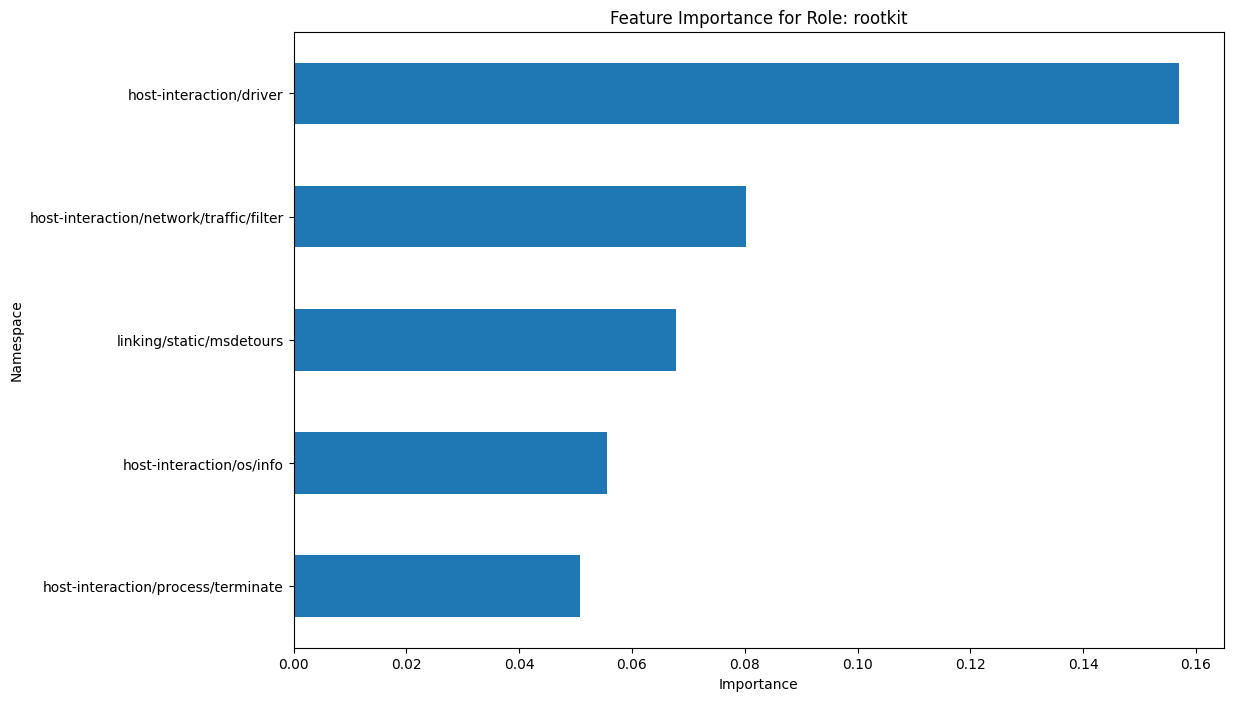

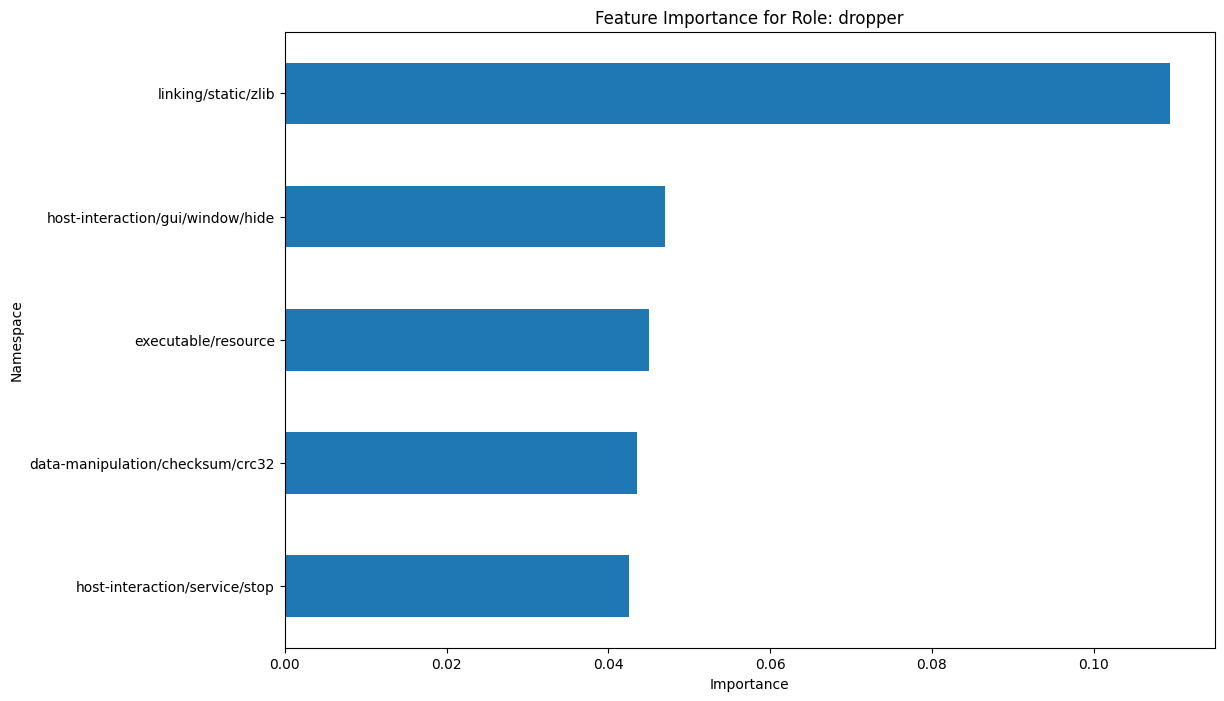

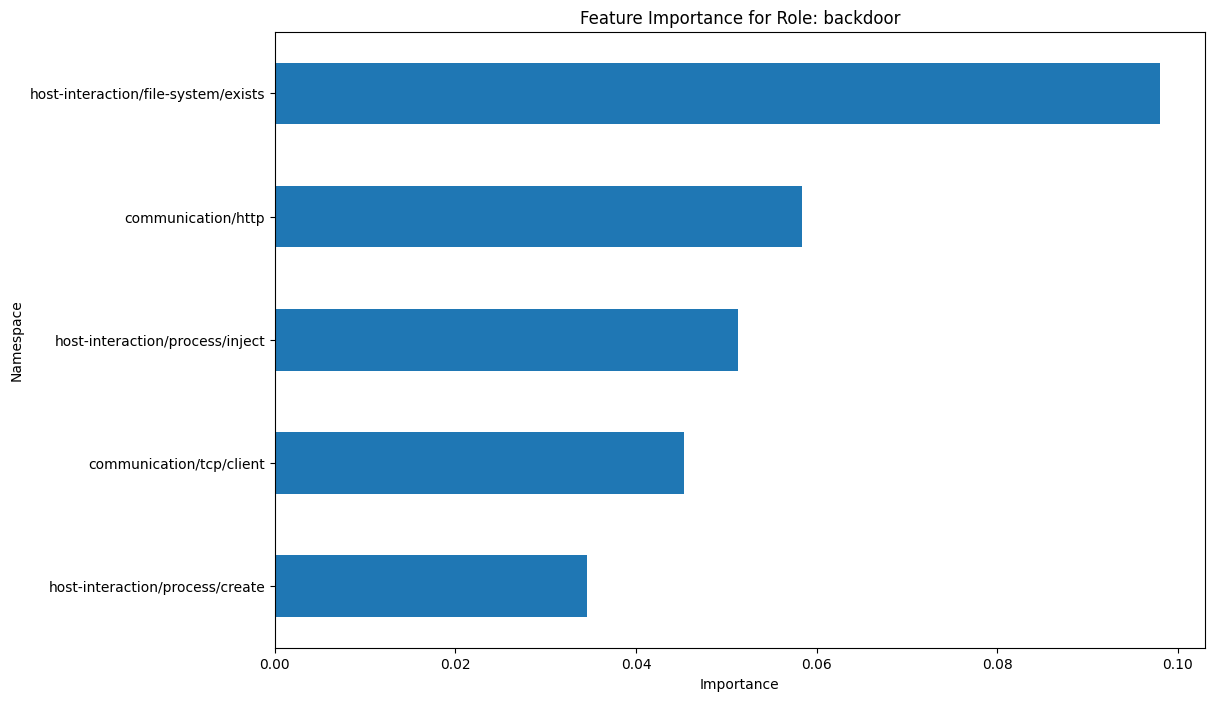

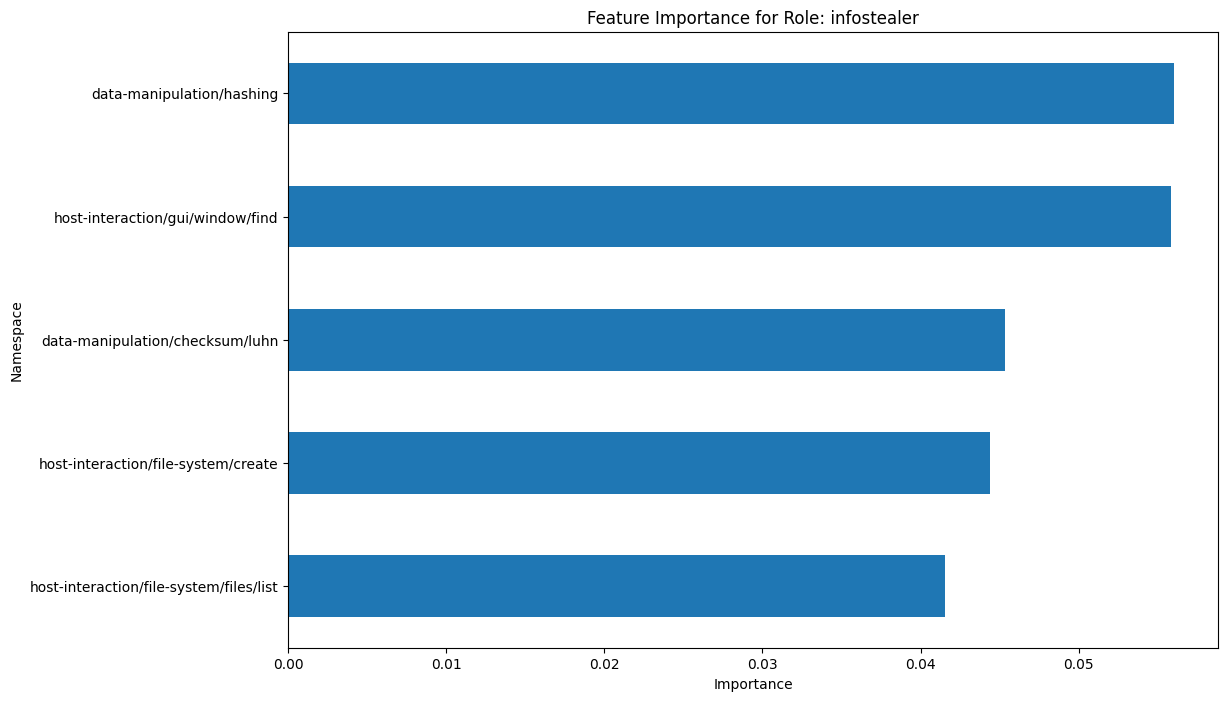

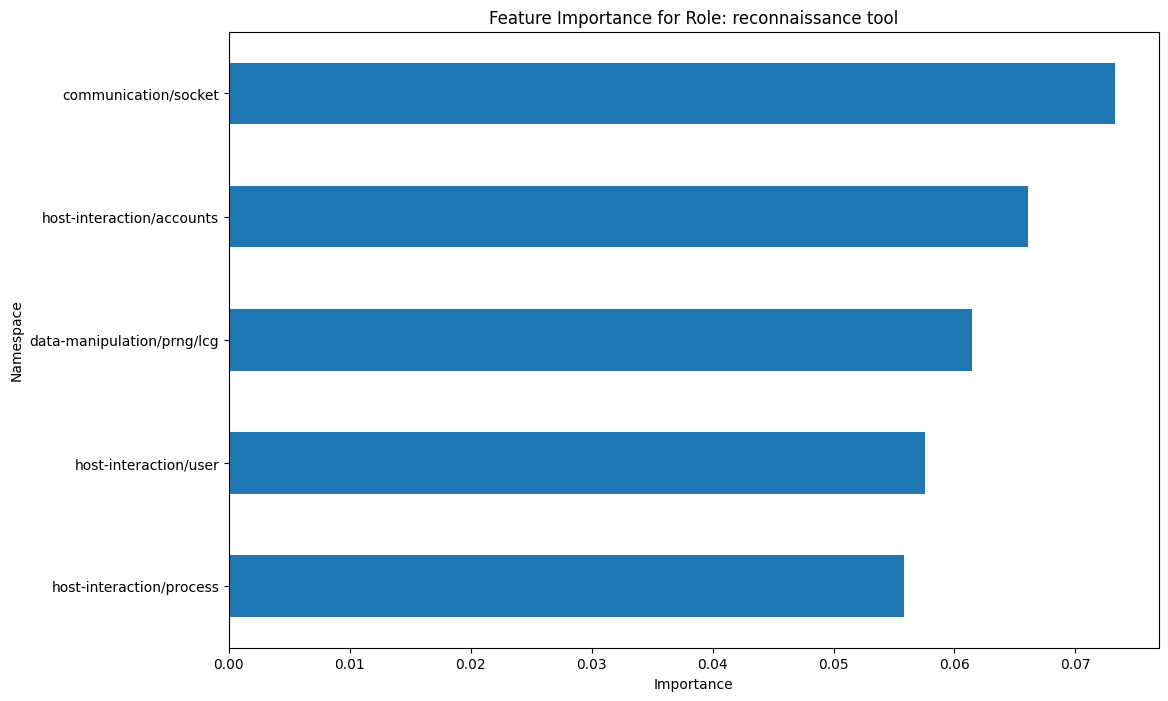

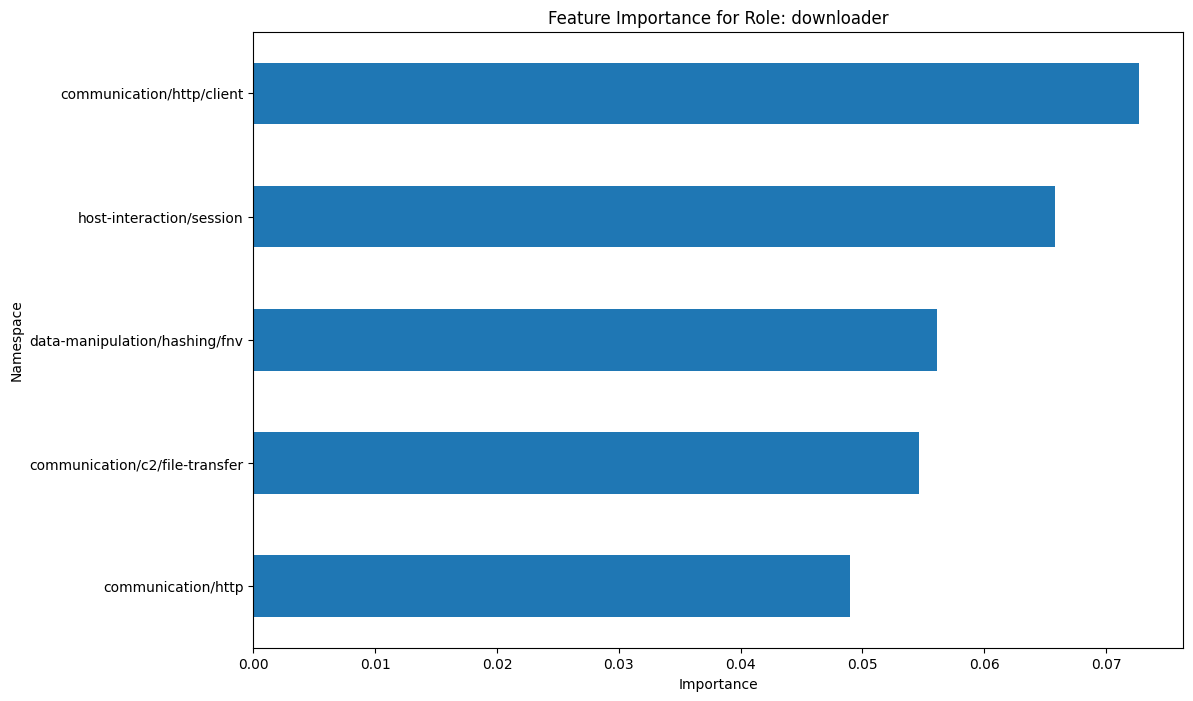

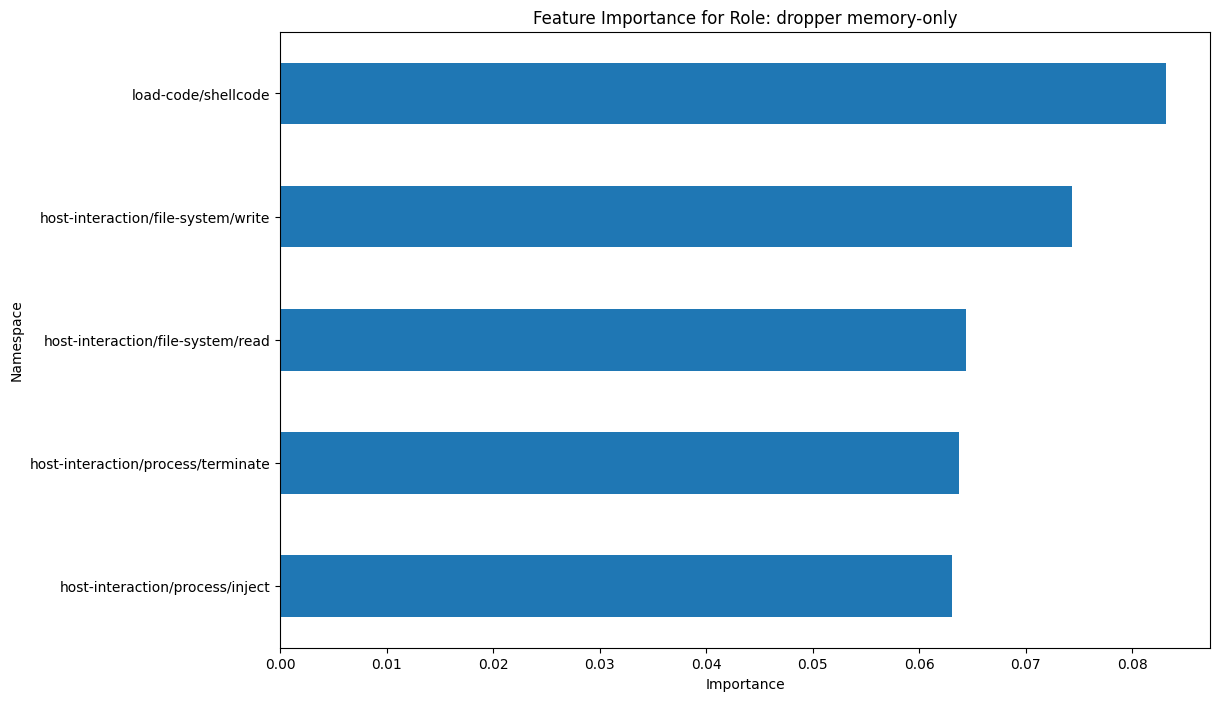

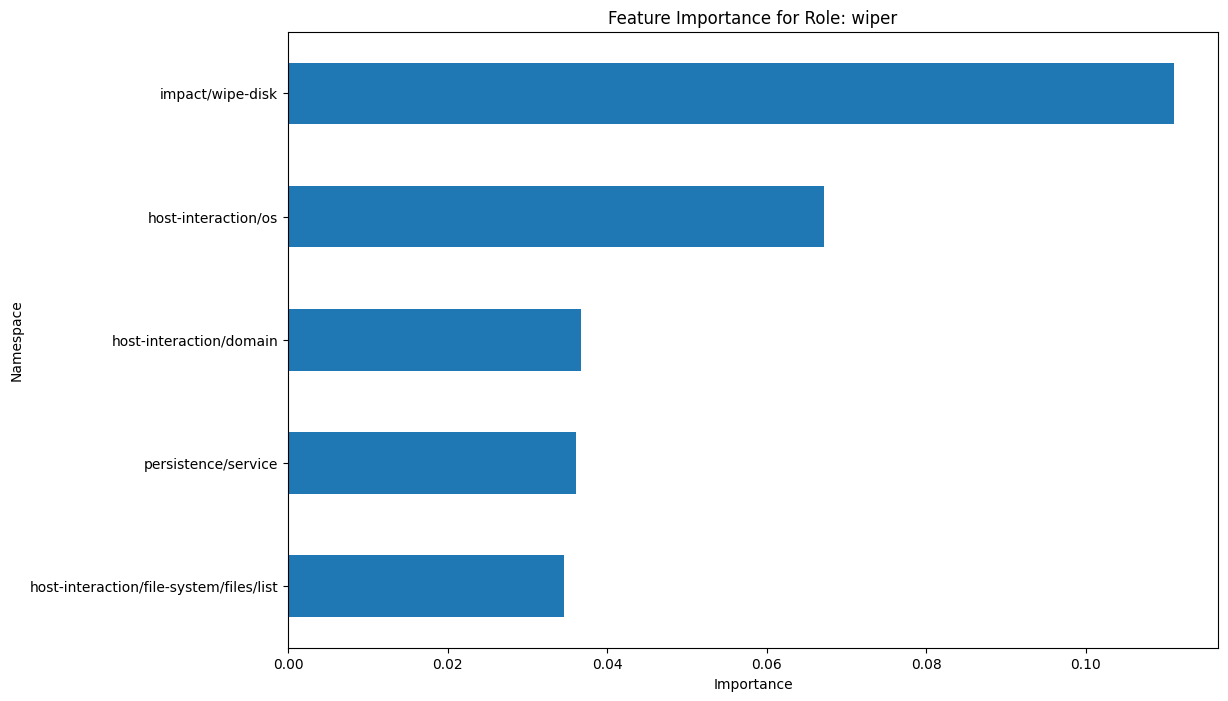

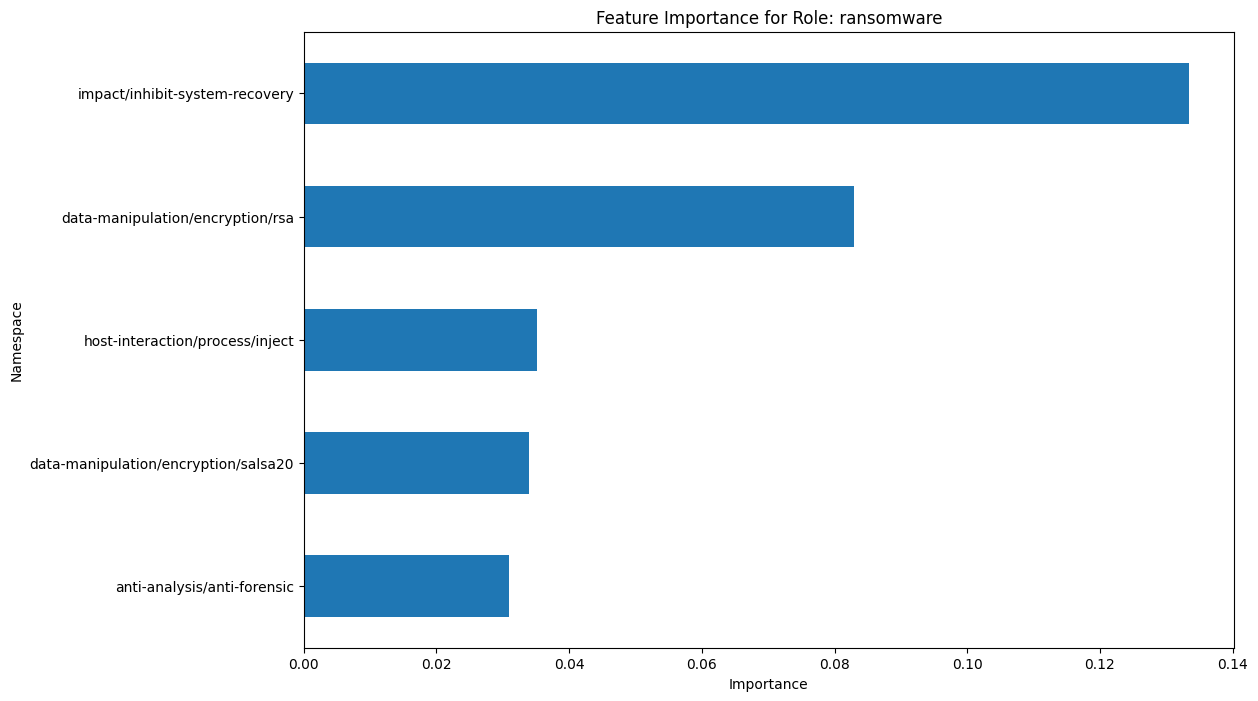

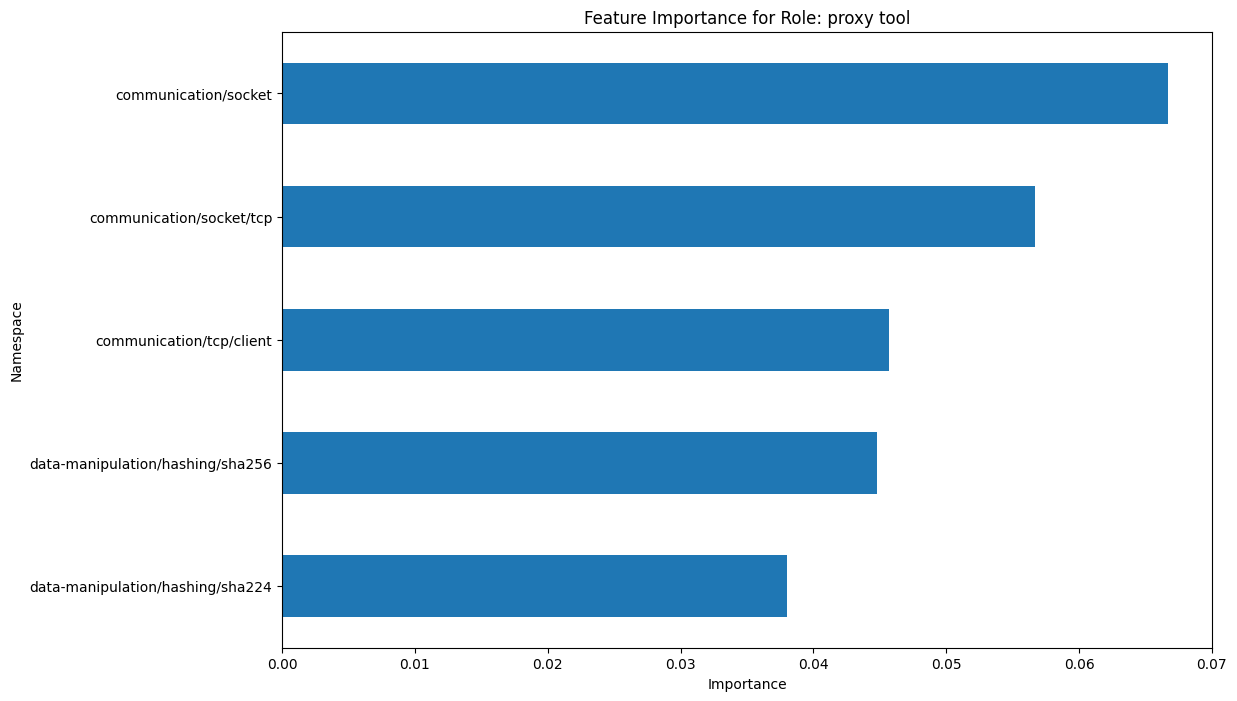

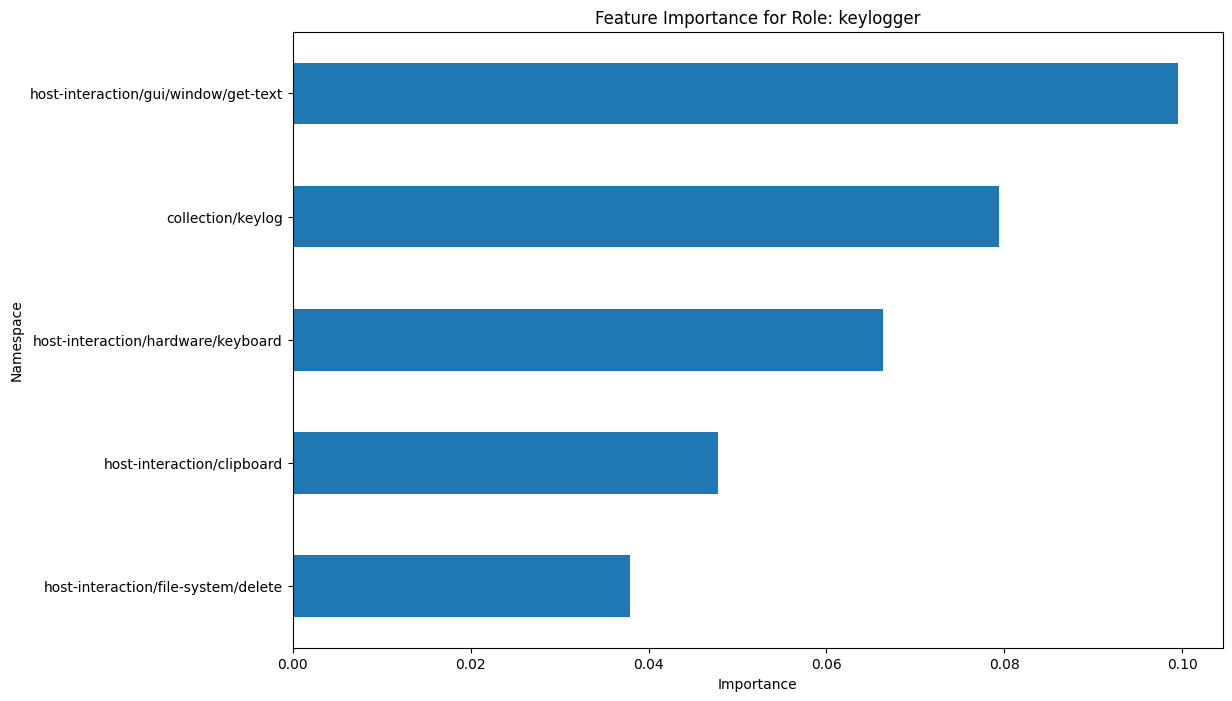

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to train model and get feature importances for a specific role
def get_feature_importances_for_role(role):
    # Create target for the specific role
    y = (normalized_namespace_df["role"] == role).astype(int)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    print(f"Accuracy for role {role}: {accuracy_score(y_test, y_pred)}")
    
    # Get feature importances
    feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    return feature_importances

# Prepare features and target
X = normalized_namespace_df.drop(columns=["role"])

# Get feature importances for each role
role_feature_importances = {}
for role in normalized_namespace_df["role"].unique():
    role_feature_importances[role] = get_feature_importances_for_role(role)

# Plot feature importances for each role
for role, importances in role_feature_importances.items():
    plt.figure(figsize=(12, 8))
    importances.head(5).sort_values().plot(kind="barh")
    plt.title(f"Feature Importance for Role: {role}")
    plt.xlabel("Importance")
    plt.ylabel("Namespace")
    plt.show()

#### Observations
Reviewing the five most important features in the plots above, none stand out as head-scratchers. Most, if not all, of the selected features make sense for the given role. Not only do the five features make sense, but so do the relative importance in many cases. For example:
* The `host-interaction/driver` namespace scored well above the rest for rootkits.
* The `impact/inhibit-system-recovery` namespace scored well above the rest for ransomware.
* The `impact/wipe-disk` namespace scored well above the rest for wipers.